# Denoising Diffusion Probabilistic Models
Exercise by [Jes Frellsen](https://frellsen.org) (Technical University of Denmark), 21 March 2024 (version 1.0).\
Hints and small changes by Mikkel N. Rasmussen (Technical University of Denmark), 21 October 2025 (version 1.1).


The main task in this week's programming exercise is to implement tDenoising Diffusion Probabilistic Model (DDPM) by [Ho et al., 2020](https://proceedings.neurips.cc/paper/2020/hash/4c5bcfec8584af0d967f1ab10179ca4b-Abstract.html). We will start with the two simple toy datasets called TwoGaussian and Chequerboard (illustrated below), and then we will move on to learning DDPMs on MNIST.

We have provided you with two files:
* `Unet.py` contains the code for a U-Net predicting $\epsilon$ of reverse process on MNIST. The architecture and the implementation of the U-Net is adapted from an implementation by
[Muhammad Firmansyah Kasim](https://github.com/mfkasim1/score-based-tutorial/blob/main/03-SGM-with-SDE-MNIST.ipynb).
* `ToyData.py` contains the code for generating data from the two toy models.


You can download the files using the following commands:

In [ ]:
! curl -O https://raw.githubusercontent.com/DeepLearningDTU/Deep-Learning-with-PyTorch-1weekcourse/master/5_Diffusion/ToyData.py
! curl -O https://raw.githubusercontent.com/DeepLearningDTU/Deep-Learning-with-PyTorch-1weekcourse/master/5_Diffusion/Unet.py

# Toy data
First we visualize the probability densities for the toy datasets.

When we create an object of the `Chequerboard` or `TwoGaussian`, we can call the forward method which returns a `Distribution` object from `torch.distributions`. The `Distribution` class implements a method for calculating the log probability (`log_prob(...)`), which we will use to make the plots below, and method for sampling from the distribuion (`sample(...)`), which we will later use for creating our training data.

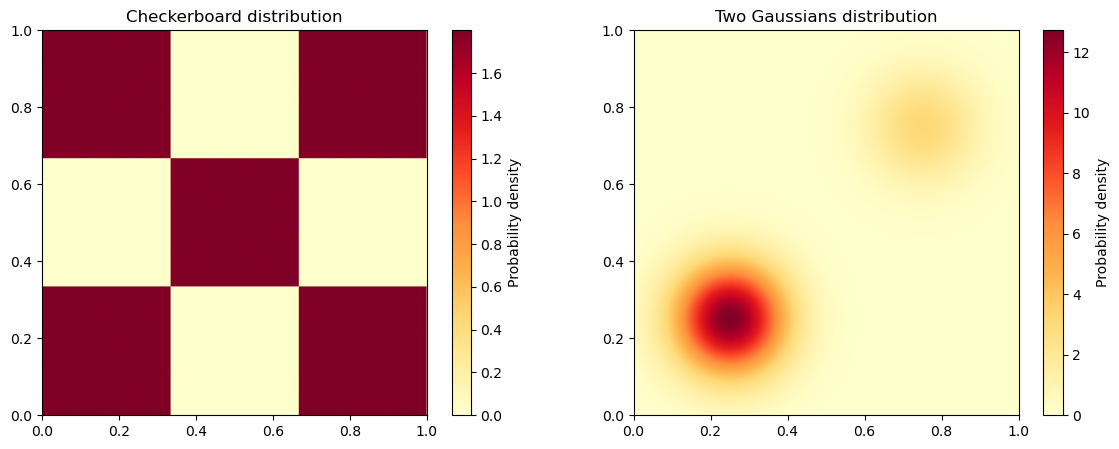

In [2]:
import torch
import ToyData
import matplotlib.pyplot as plt
import numpy as np

# Make a density plot of the Checkerboard distribution
toy = ToyData.Chequerboard()
coordinates = [[[x,y] for x in np.linspace(*toy.xlim, 1000)] for y in np.linspace(*toy.ylim, 1000)]
prob = torch.exp(toy().log_prob(torch.tensor(coordinates)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
im = ax1.imshow(prob, extent=[toy.xlim[0], toy.xlim[1], toy.ylim[0], toy.ylim[1]], origin='lower', cmap='YlOrRd')
ax1.set_xlim(toy.xlim)
ax1.set_ylim(toy.ylim)
ax1.set_aspect('equal')
cbar1 = fig.colorbar(im, ax=ax1)
ax1.set_title('Checkerboard distribution')
cbar1.set_label('Probability density')

# Make a density plot of the Gaussian distribution
toy = ToyData.TwoGaussians()
coordinates = [[[x,y] for x in np.linspace(*toy.xlim, 1000)] for y in np.linspace(*toy.ylim, 1000)]
prob = torch.exp(toy().log_prob(torch.tensor(coordinates)))

im = ax2.imshow(prob, extent=[toy.xlim[0], toy.xlim[1], toy.ylim[0], toy.ylim[1]], origin='lower', cmap='YlOrRd')
ax2.set_xlim(toy.xlim)
ax2.set_ylim(toy.ylim)
ax2.set_aspect('equal')
ax2.set_title('Two Gaussians distribution')
cbar2 = fig.colorbar(im, ax=ax2)
cbar2.set_label('Probability density')

# Implementing the DDPM
**DDPM implementation:** Below we provide an implementation of the DDPM. The code is missing the implementation of the loss and sample function. Your task will be to complete them (see Exercise 1 below). Below you see the two algorithms you will need to implement.

![ddpm_algo](img/ddpm_algorithms.png)

In [ ]:
import torch
import torch.nn as nn

class DDPM(nn.Module):
    def __init__(self, network, beta_1=1e-4, beta_T=2e-2, T=100):
        """
        Initialize a DDPM model.

        Parameters:
        network: [nn.Module]
            The network to use for the diffusion process.
        beta_1: [float]
            The noise at the first step of the diffusion process.
        beta_T: [float]
            The noise at the last step of the diffusion process.
        T: [int]
            The number of steps in the diffusion process.
        """
        super(DDPM, self).__init__()
        self.network = network
        self.beta_1 = beta_1
        self.beta_T = beta_T
        self.T = T

        self.beta = nn.Parameter(torch.linspace(beta_1, beta_T, T), requires_grad=False)
        self.alpha = nn.Parameter(1 - self.beta, requires_grad=False)
        self.alpha_cumprod = nn.Parameter(self.alpha.cumprod(dim=0), requires_grad=False)
    
    def negative_elbo(self, x):
        """
        Evaluate the DDPM negative ELBO on a batch of data.

        Parameters:
        x: [torch.Tensor]
            A batch of data (x) of dimension `(batch_size, *)`.
        Returns:
        [torch.Tensor]
            The negative ELBO of the batch of dimension `(batch_size,)`.
        """

        ### Implement Algorithm 1 here ###
        neg_elbo = None

        return neg_elbo

    def sample(self, shape):
        """
        Sample from the model.

        Parameters:
        shape: [tuple]
            The shape of the samples to generate.
        Returns:
        [torch.Tensor]
            The generated samples.
        """
        # Sample x_t for t=T (i.e., Gaussian noise)
        x_t = torch.randn(shape).to(self.alpha.device)

        # Sample x_t given x_{t+1} until x_0 is sampled
        for t in range(self.T-1, -1, -1):
            ### Implement the remaining of Algorithm 2 here ###
            pass

        return x_t

    def loss(self, x):
        """
        Evaluate the DDPM loss on a batch of data.

        Parameters:
        x: [torch.Tensor]
            A batch of data (x) of dimension `(batch_size, *)`.
        Returns:
        [torch.Tensor]
            The loss for the batch.
        """
        return self.negative_elbo(x).mean()


### Algorithm 1 — Hints

<details>
<summary>General</summary>

Remember to have in mind the shape of each variable at each step. Check your assumptions about the shape of the different variables with some print statements.

</details>

<details>
<summary>Hint 1</summary>

$$\mathbf{x}_0 \sim q(\mathbf{x}_0)$$

The first line in the algorithm simply means that you will need to draw data points from the data distribution. Do you need to do anything to get this or do you already have it?
</details>

<details>
<summary>Hint 2</summary>

$$t \sim \text{Uniform}( \{ 1, \dots, T \})$$

The second line in the algorithm means that you will need to sample the time steps uniformly between $1$ and $T$. You can sample integers uniformly in pytorch using the function `torch.randint(...)`. Remember to think about the dimensions of the time steps. As also mentioned below, it is a good idea to normalize the time step to $[0,1]$. How can you do this in a very simple way?
</details>

<details>
<summary>Hint 3</summary>

$$\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$$

The third line in the algorithm means that you will need to sample $\boldsymbol{\epsilon}$ from a standard normal distribution. This can simply be done by using the pytorch function `torch.randn_like(...)`, where you can pass a pytorch tensor as input to get samples of the same dimensions. We want $\boldsymbol{\epsilon}$ to be the same shape as $\mathbf{x}_0$, i.e. `x` in the code.
</details>

<details>
<summary>Hint 4</summary>

Next, you will need to make the network prediction of the noise $\boldsymbol{\epsilon}_{\theta}(\dots)$. We almost have all of the ingredients, we are only missing the $\bar{\alpha}_t$. From the paper we know that

$$\bar{\alpha}_t := \prod_{s=1}^{t} \alpha_s$$
$$\alpha_t := 1 - \beta_t$$

Are these available to us in the `DDPM` python class? You will have to use you the time steps $t$ to index $\bar{\alpha}$ to get values at the right time steps. You can do this in pytorch by `self.alpha_cumprod[t_idx]`, where `t_idx` is the time steps with the shape `(batch_size, 1)`.

</details>

<details>
<summary>Hint 5</summary>

$$
\boldsymbol{\epsilon}_{\theta}\left(\sqrt{\bar{\alpha}} \mathbf{x}_0 + \sqrt{1 - \bar{\alpha}} \boldsymbol{\epsilon}, t\right)
$$

Now we have all the ingredients to make a prediction of the noise with the model. In order to make a prediction with the network you will need to use the `.forward` method from whatever you specify as `self.network` in the class. For example you if you use the `FcNetwork` class provided below, you will be using the `forward` method of this class. This method takes as input a batch of data `x` of dimension `(batch_size, input_dim)` and the time step for each data point in the batch of dimension `(batch_size, 1)`. Remember to normalize the time steps.

</details>

<details>
<summary>Hint 6</summary>

Finally, you will need to calculate the error, $||\boldsymbol{\epsilon} - \boldsymbol{\epsilon}_{\theta}(\dots)||^2$, between the sampled noise $\boldsymbol{\epsilon}$ and the network predictions, $\boldsymbol{\epsilon}_{\theta}(\dots)$. This can be calculated like this `((...)**2).sum(dim=1)` in pytorch. Do not worry about the $\nabla_{\theta}$, this simply means that we need to calculate the gradients with respect to the parameters of the network in order to minimize this error term. This will be automatically calculated by pytorch in the `.backward` method during the training process.

### Algorithm 2 — Hints

<details>
<summary>Hint 1</summary>

$$\mathbf{x}_T \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$$

This first line in the algorithm means that you will need to sample $\mathbf{x}_T$ from a standard normal distribution. Do you need to do this or has it already been done for you?

</details>

<details>
<summary>Hint 2</summary>

$$\mathbf{z} \sim \mathcal{N}(\mathbf{0}, \mathbf{I}) \:\text{if}\: t > 1 \: \text{else}\: \mathbf{z} = \mathbf{0}$$

This just means that if the time step $t$ is greater that $1$ then $\mathbf{z}$ should be sampled from a standard normal distribution, else it should simply be set to zero. You can create a matrix full of zeros with specific dimensions by using the pytorch function `torch.zeros(...)`. I think you know how to sample from a standard normal distribution by now :)

</details>

<details>
<summary>Hint 3</summary>

$$
\mathbf{x}_{t - 1} = \frac{1}{\sqrt{\alpha_t}} \left( \mathbf{x}_t  - \frac{1 - \alpha_t}{\sqrt{1 - \bar{\alpha}}_t} \boldsymbol{\epsilon}_{\theta}(\mathbf{x}_t, t)\right) + \sigma_t \mathbf{z}
$$

In order to form the denoised prediction for the next time step, $\mathbf{x}_{t - 1}$, we will need the parameters $\alpha_t$, $\bar{\alpha}_t$ and $\sigma_t$. Here we will use $\sigma^2_t=\beta_t$, which is also mentioned in the paper to work well experimentally. Are all of these parameters available to us in the `DDPM` python class?

</details>

<details>
<summary>Hint 4</summary>

You need to pass the normalized time steps into the model. You can create a matrix of size `(batch_size, 1)` for the current time step by using the pytorch function `torch.full(...)`.


**Training loop**: We have also implemented a generic training loop for learning the DDPM model.

In [ ]:
from tqdm import tqdm

def train(model, optimizer, data_loader, epochs, device):
    """
    Train a Flow model.

    Parameters:
    model: [Flow]
       The model to train.
    optimizer: [torch.optim.Optimizer]
         The optimizer to use for training.
    data_loader: [torch.utils.data.DataLoader]
            The data loader to use for training.
    epochs: [int]
        Number of epochs to train for.
    device: [torch.device]
        The device to use for training.
    """
    model.train()

    total_steps = len(data_loader)*epochs
    progress_bar = tqdm(range(total_steps), desc="Training")

    for epoch in range(epochs):
        data_iter = iter(data_loader)
        for x in data_iter:
            if isinstance(x, (list, tuple)):
                x = x[0]
            x = x.to(device)
            optimizer.zero_grad()
            loss = model.loss(x)
            loss.backward()
            optimizer.step()

            # Update progress bar
            progress_bar.set_postfix(loss=f"⠀{loss.item():12.4f}", epoch=f"{epoch+1}/{epochs}")
            progress_bar.update()


**Network:** We will use a fully connect network for predicting $\epsilon$ on the toy data. The `forward` function takes as input the data `x` and the time step `t` and concatenates them before sending them though the fully connected network.

In [ ]:
class FcNetwork(nn.Module):
    def __init__(self, input_dim, num_hidden):
        """
        Initialize a fully connected network for the DDPM, where the forward function also take time as an argument.
        
        parameters:
        input_dim: [int]
            The dimension of the input data.
        num_hidden: [int]
            The number of hidden units in the network.
        """
        super(FcNetwork, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_dim+1, num_hidden), nn.ReLU(), 
                                     nn.Linear(num_hidden, num_hidden), nn.ReLU(), 
                                     nn.Linear(num_hidden, input_dim))

    def forward(self, x, t):
        """"
        Forward function for the network.
        
        parameters:
        x: [torch.Tensor]
            The input data of dimension `(batch_size, input_dim)`
        t: [torch.Tensor]
            The time steps to use for the forward pass of dimension `(batch_size, 1)`
        """
        x_t_cat = torch.cat([x, t], dim=1)
        return self.network(x_t_cat)

**Training data**: Next, we generate some training data from the TwoGaussians datasets and create a `data_loader`. We generate a dataset with 10M data points and use a large batch size of 10,000. We can do so, since it is only a two-dimensional dataset.

In [ ]:
# Generate the data
import ToyData

n_data = 10000000
batch_size = 10000

toy = ToyData.TwoGaussians()
transform = lambda x: (x-0.5)*2.0
train_loader = torch.utils.data.DataLoader(transform(toy().sample((n_data,))), batch_size=batch_size, shuffle=True)

**Initialize the model and run the training loop**: Finally we initializes the model and run the training loop. Remember that this will not work before you have completed the assignment below.

In [ ]:
# Get the dimension of the dataset
D = next(iter(train_loader)).shape[1]

# Define the network
num_hidden = 64
network = FcNetwork(D, num_hidden)

# Set the number of steps in the diffusion process
T = 1000

# Define model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DDPM(network, T=T).to(device)

# Define optimizer
lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Train model
epochs = 1
train(model, optimizer, train_loader, epochs, device)

**Sampling**: The following code samples from a trained model and plots the samples

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate samples
model.eval()
with torch.no_grad():
    samples = (model.sample((10000,D))).cpu() 

    # Transform the samples back to the original space
    samples = samples /2 + 0.5

# Plot the density of the toy data and the model samples
coordinates = [[[x,y] for x in np.linspace(*toy.xlim, 1000)] for y in np.linspace(*toy.ylim, 1000)]
prob = torch.exp(toy().log_prob(torch.tensor(coordinates)))

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
im = ax.imshow(prob, extent=[toy.xlim[0], toy.xlim[1], toy.ylim[0], toy.ylim[1]], origin='lower', cmap='YlOrRd')
ax.scatter(samples[:, 0], samples[:, 1], s=1, c='black', alpha=0.5)
ax.set_xlim(toy.xlim)
ax.set_ylim(toy.ylim)
ax.set_aspect('equal')
fig.colorbar(im)

# Exercise 1
Complete the DDPM implementation above, by implementing the following parts:
* `DDPM.negative_elbo(...) should return the negative ELBO of equation (14) from the DDPMs paper ([Ho et al., 2020](https://proceedings.neurips.cc/paper/2020/hash/4c5bcfec8584af0d967f1ab10179ca4b-Abstract.html)) by implementing Algorithm 1 in the paper.
* `DDPM.sample(shape)` should implement Algorithm 2 in the DDPMs paper ([Ho et al., 2020](https://proceedings.neurips.cc/paper/2020/hash/4c5bcfec8584af0d967f1ab10179ca4b-Abstract.html)). For the covariance matrix of the reverse process use $\sigma^2_t\mathbf{I}$ with $\sigma^2_t=\beta_t$. For example, to sample 5000 samples for the 2D toy examples, the method would be called with the argument `(5000, 2)`.

A simple, fully connected network is implemented in the class `FcNetwork`. Note that the method `FcNetwork.forward(x, t)` takes as input a batch of data `x` of dimension `(batch_size, input_dim)` and the time step for each data point in the batch of dimension `(batch_size, 1)`. The method concatenates the data and the time step before inputting it to the network, and it is a good idea to normalize the time step to $[0,1]$.

Test the implementation on both the TwoGaussians and Chequerboard datasets and answer the following questions:
* Can you improve the fit to the Chequerboard dataset by modifying the network architecture?

# Exercise 2
Use the DPPM implementation from Exercise 1 to learn a DDPM on MNIST. You *do not* need to implement a discrete likelihood function for the DDPM as suggested in section 3.3 by DDPMs paper ([Ho et al., 2020](https://proceedings.neurips.cc/paper/2020/hash/4c5bcfec8584af0d967f1ab10179ca4b-Abstract.html)). Instead, we will [dequantize](https://jmtomczak.github.io/blog/3/3_flows.html#Coupling-layers,-permutation-layers-and-dequantization) the pixel values (i.e., add noise to them) and transform them to $[-1, 1]$, which can be done with the code:

In [1]:
from torchvision import transforms
from torchvision import datasets

transform=transforms.Compose([transforms.ToTensor(),
            transforms.Lambda(lambda x: x + torch.rand(x.shape)/255),
            transforms.Lambda(lambda x: (x-0.5)*2.0),
            transforms.Lambda(lambda x: x.flatten())]
            )

train_data = datasets.MNIST('data/', train=True, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:07<00:00, 1.36MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 299kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 1.79MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.40MB/s]


Remember to transform the pixel values back to $[0,1]$ before displaying samples.

You should both test a fully connected architecture and the provided U-Net architecture (in `Unet.py`). Please answer the following questions:
* Can you learn a DDPM on MNIST using a fully connected architecture?
* Are the samples from the DDPM qualitatively better when using the U-Net  architecture?

*Hint:* Remember to change the batch size to, e.g., 64, and you will need to train the model for around 50-100 epochs to get a good model, which takes around 15 minutes on a GPU.


*Hint*: To run on GPU you have two options, either you will use the [JupyterHub GPU (L40)](https://services.healthtech.dtu.dk/gpujupyter/) or [JupyterHub GPU (H100)](https://services.healthtech.dtu.dk/newjupyter/) setup on the Health Tech server or you can run it in Google Colab [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/IsoformAnalysisGroup/Deep-Learning-with-PyTorch-1weekcourse/blob/master/5_Diffusion/5-DDPM.ipynb)

In order to get this exercise on the Health Tech server (and thereby being able to use it in JupyterHub), you will first need to `git clone` the exercise onto the server. 
```{bash}
ssh <user-name>@login.healthtech.dtu.dk
cd /home/projects2/<user-name>
git clone https://github.com/IsoformAnalysisGroup/Deep-Learning-with-PyTorch-1weekcourse.git
```


*Hint:* If you have a mini batch of samples of images, you can display them in the notebook using the following code

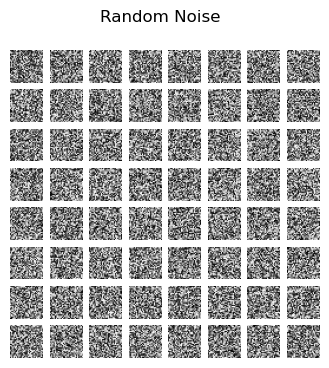

In [22]:
image_tensor = torch.rand(64, 784)
f, axarr = plt.subplots(8, 8, figsize=(4, 4))
for i, ax in enumerate(axarr.flat):
    ax.imshow(image_tensor[i].view(28, 28), cmap="binary_r")
    ax.axis('off')
plt.suptitle('Random Noise')
plt.show()

Here are some examples from the MNIST dataset.

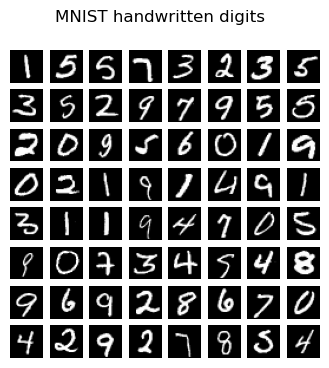

In [ ]:
# update the train_loader to use the new dataset
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# # Load a batch of images into memory
images, labels = next(iter(train_loader))

#plot a few MNIST examples
f, axarr = plt.subplots(8, 8, figsize=(4, 4))
for i, ax in enumerate(axarr.flat):
    ax.imshow(images[i].view(28, 28), cmap="binary_r")
    ax.axis('off')
    
plt.suptitle('MNIST handwritten digits')
plt.show()

### Hints for Exercise 2

<details>
<summary>Hint 1</summary>

What code did you need to train the DDPM model on the toy datasets?

</details>

<details>
<summary>Hint 2</summary>

If using the `Unet` for the network remember to import it using `from Unet import Unet`.

</details>

<details>
<summary>Hint 3</summary>

You can transform the pixel values back to $[0, 1]$ by doing `img = (img/2 + 0.5)`.

</details>